Player Performance analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/EDA/EDA_Football.csv')
df

<ipython-input-1-58a31276d432>:5: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/EDA/EDA_Football.csv')


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\r\n\r\n\r\n\r\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\r\n\r\n\r\n\r\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\r\n\r\n\r\n\r\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\r\n\r\n\r\n\r\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\r\n\r\n\r\n\r\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\r\n\r\n\r\n\r\nWuhan Zall,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\r\n\r\n\r\n\r\nOldham Athletic,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\r\n\r\n\r\n\r\nDerry City,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\r\n\r\n\r\n\r\nDalian YiFang FC,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


In [2]:
df.shape

(18979, 77)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [4]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

## Cleaning

In [5]:
df1 =df[['ID', 'Name', #'LongName',
    # 'photoUrl',
    # 'playerUrl',
    'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions',
      'Height', 'Weight',
       'Preferred Foot',
         'BOV', 'Best Position',
        'Joined',
    #  'Loan Date End',
       'Value',
         'Wage',
        'Release Clause',
        'Attacking',
        # 'Crossing',
        #'Finishing',
       'Heading Accuracy',
        #'Short Passing',
        # 'Volleys',
        # 'Skill', #'Dribbling',
      #  'Curve',
        'FK Accuracy', #'Long Passing', 'Ball Control', 'Movement',
      #  'Acceleration', 'Sprint Speed', 'Agility',
      #   'Balance',
      #  'Power',
        'Shot Power',
         #'Jumping',
         #'Reactions',
      'Stamina',
      'Strength',
    'Long Shots',
      #  'Mentality',
    #  'Aggression',
        #'Interceptions',
        'Positioning',
    # 'Vision',
       'Penalties',
    # 'Composure',
    # 'Defending',
        # 'Marking',
        #'Standing Tackle',
       #'Sliding Tackle',
        'Goalkeeping',
      #   'GK Diving',
      #   'GK Handling',
      #  'GK Kicking', 'GK Positioning', 'GK Reflexes',
         'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY',
        'Hits'
        ]]
df1

,ID,Name,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,\r\n\r\n\r\n\r\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,Portugal,35,92,92,\r\n\r\n\r\n\r\nJuventus,2018 ~ 2022,"ST, LW",187cm,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Slovenia,27,91,93,\r\n\r\n\r\n\r\nAtlético Madrid,2014 ~ 2023,GK,188cm,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Belgium,29,91,91,\r\n\r\n\r\n\r\nManchester City,2015 ~ 2023,"CAM, CM",181cm,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Brazil,28,91,91,\r\n\r\n\r\n\r\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,China PR,21,47,55,\r\n\r\n\r\n\r\nWuhan Zall,2018 ~ 2022,CB,178cm,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,England,17,47,67,\r\n\r\n\r\n\r\nOldham Athletic,2020 ~ 2021,CM,175cm,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,England,18,47,65,\r\n\r\n\r\n\r\nDerry City,2019 ~ 2020,CM,179cm,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,China PR,20,47,57,\r\n\r\n\r\n\r\nDalian YiFang FC,2020 ~ 2022,RW,175cm,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


In [6]:
df["Release Clause"].head(40)

,Release Clause
0,€138.4M
1,€75.9M
2,€159.4M
3,€161M
4,€166.5M
5,€132M
6,€144.3M
7,€120.3M
8,€203.1M
9,€147.7M


In [7]:
df['Hits'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18979 entries, 0 to 18978
Series name: Hits
Non-Null Count  Dtype 
--------------  ----- 
16384 non-null  object
dtypes: object(1)
memory usage: 148.4+ KB


In [8]:
df['Hits'].isna().sum()

2595

In [100]:
df1['Club'] = df1['Club'].str.replace('\r\n\r\n\r\n\r\n', '').str.strip()

<ipython-input-100-d1b6df3851d2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [101]:
# replace ~
df1['Contract'] = df1['Contract'].str.replace('~', '-')

<ipython-input-101-840c33caf20a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
df1

,ID,Name,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height(cm),...,A/W,D/W,IR(Out of 5★),PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,2004 - 2021,"RW, ST, CF",170.0,...,Medium,Low,5,85,92,91,95,38,65,771.0
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 - 2022,"ST, LW",187.0,...,High,Low,5,89,93,81,89,35,77,562.0
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 - 2023,GK,188.0,...,Medium,Medium,3,87,92,78,90,52,90,150.0
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 - 2023,"CAM, CM",181.0,...,High,High,4,76,86,93,88,64,78,207.0
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 - 2022,"LW, CAM",175.0,...,High,Medium,5,91,85,86,94,36,59,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,China PR,21,47,55,Wuhan Zall,2018 - 2022,CB,178.0,...,Medium,Medium,1,64,28,26,38,48,51,1.0
18975,258760,B. Hough,England,17,47,67,Oldham Athletic,2020 - 2021,CM,175.0,...,Medium,Medium,1,64,40,48,49,35,45,1.0
18976,252757,R. McKinley,England,18,47,65,Derry City,2019 - 2020,CM,179.0,...,Medium,Medium,1,63,39,44,46,40,53,1.0
18977,243790,Wang Zhen'ao,China PR,20,47,57,Dalian YiFang FC,2020 - 2022,RW,175.0,...,Medium,Medium,1,58,49,41,49,30,44,1.0


In [103]:
df1.nunique()

,0
ID,17920
Name,17920
Nationality,162
Age,29
↓OVA,47
POT,48
Club,682
Contract,131
Positions,632
Height(cm),62


# **removing Duplicates**

In [104]:
df1=df1.drop_duplicates(subset='Name')

In [105]:
df1

,ID,Name,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height(cm),...,A/W,D/W,IR(Out of 5★),PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,2004 - 2021,"RW, ST, CF",170.0,...,Medium,Low,5,85,92,91,95,38,65,771.0
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 - 2022,"ST, LW",187.0,...,High,Low,5,89,93,81,89,35,77,562.0
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 - 2023,GK,188.0,...,Medium,Medium,3,87,92,78,90,52,90,150.0
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 - 2023,"CAM, CM",181.0,...,High,High,4,76,86,93,88,64,78,207.0
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 - 2022,"LW, CAM",175.0,...,High,Medium,5,91,85,86,94,36,59,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,China PR,21,47,55,Wuhan Zall,2018 - 2022,CB,178.0,...,Medium,Medium,1,64,28,26,38,48,51,1.0
18975,258760,B. Hough,England,17,47,67,Oldham Athletic,2020 - 2021,CM,175.0,...,Medium,Medium,1,64,40,48,49,35,45,1.0
18976,252757,R. McKinley,England,18,47,65,Derry City,2019 - 2020,CM,179.0,...,Medium,Medium,1,63,39,44,46,40,53,1.0
18977,243790,Wang Zhen'ao,China PR,20,47,57,Dalian YiFang FC,2020 - 2022,RW,175.0,...,Medium,Medium,1,58,49,41,49,30,44,1.0


In [106]:
df1.describe()

,ID,Age,↓OVA,POT,Height(cm),BOV,Value,Wage,Release Clause(€),Attacking,...,Total Stats,Base Stats,IR(Out of 5★),PAC,SHO,PAS,DRI,DEF,PHY,Hits
count,17920.000000,17920.000000,17920.000000,17920.000000,17920.000000,17920.000000,1.792000e+04,17920.000000,1.792000e+04,17920.000000,...,17920.000000,17920.000000,17920.000000,17920.000000,17920.000000,17920.000000,17920.000000,17920.000000,17920.000000,17920.00000
mean,225993.853292,25.244531,65.894141,71.234821,181.276259,66.919308,2.963318e+06,9392.435826,4.102711e+06,249.822600,...,1599.574219,356.584152,1.095480,67.510379,53.630915,57.873549,63.043080,50.011607,64.514621,23.74654
std,27165.550622,4.699357,6.981700,6.120768,6.809661,6.758423,7.879176e+06,20174.815979,1.000991e+07,74.461916,...,270.371341,40.807439,0.369587,10.716734,13.840644,10.094098,9.933707,16.489535,9.605797,122.83109
min,41.000000,16.000000,47.000000,47.000000,155.000000,48.000000,0.000000e+00,0.000000,0.000000e+00,42.000000,...,747.000000,232.000000,1.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000,1.00000
25%,209607.500000,21.000000,61.000000,67.000000,176.000000,63.000000,4.750000e+05,1000.000000,4.320000e+05,223.000000,...,1456.000000,328.000000,1.000000,61.000000,44.000000,51.000000,58.000000,35.000000,58.000000,1.00000
50%,231863.500000,25.000000,66.000000,71.000000,181.000000,67.000000,9.750000e+05,3000.000000,1.000000e+06,264.000000,...,1632.000000,357.000000,1.000000,68.000000,56.000000,58.000000,64.000000,53.000000,66.000000,4.00000
75%,246456.250000,29.000000,70.000000,75.000000,186.000000,71.000000,2.100000e+06,9000.000000,3.000000e+06,298.000000,...,1785.250000,385.000000,1.000000,75.000000,64.000000,65.000000,70.000000,63.000000,71.000000,13.00000
max,259216.000000,53.000000,93.000000,95.000000,206.000000,93.000000,1.855000e+08,560000.000000,2.031000e+08,437.000000,...,2316.000000,498.000000,5.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000,8400.00000


In [108]:
df1.describe(include='O')

,Name,Nationality,Club,Contract,Positions,Weight,Preferred Foot,Best Position,Joined,W/F,SM,A/W,D/W
count,17920,17920,17920,17920,17920,17920,17920,17920,17920,17920,17920,17920,17920
unique,17920,162,682,131,632,79,2,15,1845,5,5,3,3
top,L. Messi,England,No Club,2019 - 2021,CB,70kg,Right,CB,"Jul 1, 2019",3 ★,2★,Medium,Medium
freq,1,1574,234,1598,2313,1412,13621,3490,1263,11033,8558,11964,13178


In [109]:

df.iloc[1000:1050,18:19]

,Loan Date End
1000,NaN
1001,"Jun 30, 2021"
1002,NaN
1003,NaN
1004,NaN
1005,NaN
1006,NaN
1007,NaN
1008,NaN
1009,"Jun 30, 2021"


In [16]:
df1['Joined'].iloc[1000:1300]

,Joined
1009,"Jul 1, 2014"
1010,"Jul 3, 2019"
1011,"Oct 2, 2018"
1012,"Jan 31, 2020"
1013,"Jul 13, 2018"
...,...
1308,"Jun 10, 2015"
1309,"Aug 17, 2020"
1310,"Sep 12, 2019"
1311,"Jan 23, 2020"


In [97]:
df[["Contract",'Joined','Loan Date End']]

,Contract,Joined,Loan Date End
0,2004 ~ 2021,"Jul 1, 2004",NaN
1,2018 ~ 2022,"Jul 10, 2018",NaN
2,2014 ~ 2023,"Jul 16, 2014",NaN
3,2015 ~ 2023,"Aug 30, 2015",NaN
4,2017 ~ 2022,"Aug 3, 2017",NaN
...,...,...,...
18974,2018 ~ 2022,"Jul 13, 2018",NaN
18975,2020 ~ 2021,"Aug 1, 2020",NaN
18976,2019 ~ 2020,"Mar 8, 2019",NaN
18977,2020 ~ 2022,"Sep 22, 2020",NaN


In [98]:
df1

,ID,Name,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height(cm),...,A/W,D/W,IR(Out of 5★),PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,2004 - 2021,"RW, ST, CF",170.0,...,Medium,Low,5,85,92,91,95,38,65,771.0
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 - 2022,"ST, LW",187.0,...,High,Low,5,89,93,81,89,35,77,562.0
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 - 2023,GK,188.0,...,Medium,Medium,3,87,92,78,90,52,90,150.0
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 - 2023,"CAM, CM",181.0,...,High,High,4,76,86,93,88,64,78,207.0
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 - 2022,"LW, CAM",175.0,...,High,Medium,5,91,85,86,94,36,59,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,China PR,21,47,55,Wuhan Zall,2018 - 2022,CB,178.0,...,Medium,Medium,1,64,28,26,38,48,51,1.0
18975,258760,B. Hough,England,17,47,67,Oldham Athletic,2020 - 2021,CM,175.0,...,Medium,Medium,1,64,40,48,49,35,45,1.0
18976,252757,R. McKinley,England,18,47,65,Derry City,2019 - 2020,CM,179.0,...,Medium,Medium,1,63,39,44,46,40,53,1.0
18977,243790,Wang Zhen'ao,China PR,20,47,57,Dalian YiFang FC,2020 - 2022,RW,175.0,...,Medium,Medium,1,58,49,41,49,30,44,1.0


In [21]:
df["Release Clause"]

,Release Clause
0,€138.4M
1,€75.9M
2,€159.4M
3,€161M
4,€166.5M
...,...
18974,€70K
18975,€165K
18976,€131K
18977,€88K


In [22]:
# def convert_to_numeric(value):
#     value = value.replace('€', '').replace(',', '')
#     if 'M' in value:
#         return float(value.replace('M', '')) * 1000000
#     elif 'K' in value:
#         return float(value.replace('K', '')) * 1000
#     else:
#         return float(value)

In [23]:
# df1['Release Clause'] = df1['Release Clause'].apply(convert_to_numeric)

In [24]:
df1

,ID,Name,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,2004 - 2021,"RW, ST, CF",170cm,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 - 2022,"ST, LW",187cm,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 - 2023,GK,188cm,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 - 2023,"CAM, CM",181cm,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 - 2022,"LW, CAM",175cm,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,China PR,21,47,55,Wuhan Zall,2018 - 2022,CB,178cm,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,England,17,47,67,Oldham Athletic,2020 - 2021,CM,175cm,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,England,18,47,65,Derry City,2019 - 2020,CM,179cm,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,China PR,20,47,57,Dalian YiFang FC,2020 - 2022,RW,175cm,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


In [25]:
df1.columns

Index(['ID', 'Name', 'Nationality', 'Age', '↓OVA', 'POT', 'Club', 'Contract',
       'Positions', 'Height', 'Weight', 'Preferred Foot', 'BOV',
       'Best Position', 'Joined', 'Value', 'Wage', 'Release Clause',
       'Attacking', 'Heading Accuracy', 'FK Accuracy', 'Shot Power', 'Stamina',
       'Strength', 'Long Shots', 'Positioning', 'Penalties', 'Goalkeeping',
       'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC',
       'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits'],
      dtype='object')

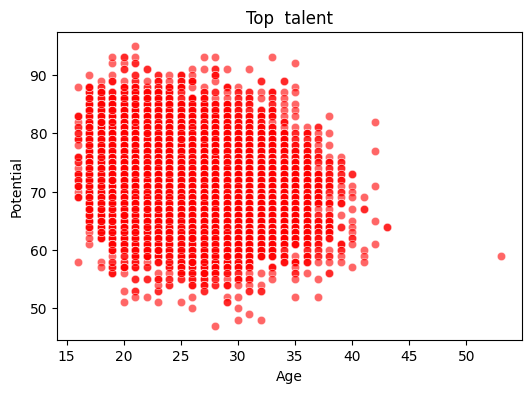

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Age', y = 'POT', data = df, alpha = 0.6, color = 'Red')
plt.title('Top  talent')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.show()

In [27]:
import pandas as pd
import plotly.express as px
forwards = df1[df1['Positions'].isin(['CF', 'LW', 'RW', 'ST'])]

# top 10
top_forwards = forwards.nlargest(10, '↓OVA')

fig = px.bar(top_forwards,
             x='Name',
             y='↓OVA',
             title='Top 10 Forward Players by Overall Rating',
             labels={'↓OVA': 'Overall Rating', 'Name': 'Player'},
             color='↓OVA',
             color_continuous_scale='Viridis')
fig.show()


In [28]:
df1

,ID,Name,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,2004 - 2021,"RW, ST, CF",170cm,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 - 2022,"ST, LW",187cm,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 - 2023,GK,188cm,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 - 2023,"CAM, CM",181cm,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 - 2022,"LW, CAM",175cm,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,China PR,21,47,55,Wuhan Zall,2018 - 2022,CB,178cm,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,England,17,47,67,Oldham Athletic,2020 - 2021,CM,175cm,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,England,18,47,65,Derry City,2019 - 2020,CM,179cm,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,China PR,20,47,57,Dalian YiFang FC,2020 - 2022,RW,175cm,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


In [29]:
df1["Height"].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [30]:
def feet_inches_to_cm(height):
    feet, inches = height.split("'")
    feet = int(feet)
    inches = int(inches.replace('"', ''))
    return feet * 30.48 + inches * 2.54

# Remove 'cm' and convert heights
def process_height(height):
    if 'cm' in height:
        return int(height.replace('cm', ''))
    elif '"' in height:
        return feet_inches_to_cm(height)
    else:
        return None

df1['Height'] = df1['Height'].apply(process_height)
df1['Height']

<ipython-input-30-3ec25e3f534d>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Height
0,170.0
1,187.0
2,188.0
3,181.0
4,175.0
...,...
18974,178.0
18975,175.0
18976,179.0
18977,175.0


In [31]:
df1.rename(columns={'Height': 'Height(cm)'}, inplace=True)

<ipython-input-31-a22ac3cffb29>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



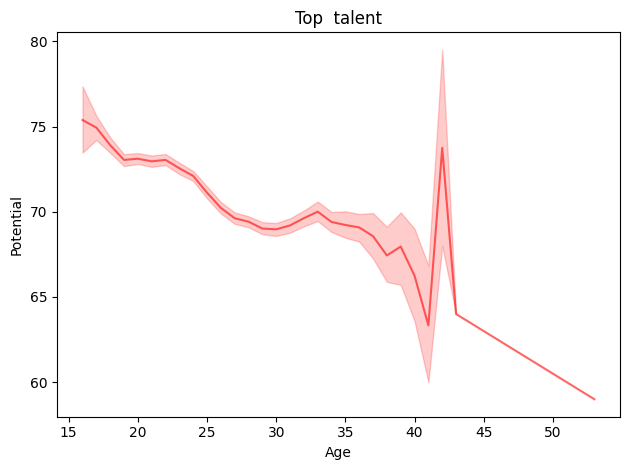

In [32]:
#Relation between height and pot

# plt.figure(figsize=(6,4))
sns.lineplot(x = 'Age', y = 'POT', data = df1, alpha = 0.6, color = 'Red')
plt.title('Top  talent')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.tight_layout()
plt.show()

In [33]:
# Sort by Overall Rating and get the top 20 players
top_20_players = df1.nlargest(20, '↓OVA')

fig = px.bar(top_20_players,
             x='Name',
             y='↓OVA',
             title='Top 20 Highest-Rated Players',
             labels={'↓OVA': 'Overall Rating', 'Name': 'Player'},
             color='↓OVA',
             color_continuous_scale='Viridis',
             text='↓OVA')
fig.show()

In [34]:
df1['IR'] = df1['IR'].str.replace('★', '').astype(int)


<ipython-input-34-df6b19677909>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
df1.rename(columns={'IR': 'IR(Out of 5★)'}, inplace=True)

<ipython-input-35-d2196c817681>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
df1['IR(Out of 5★)']

,IR(Out of 5★)
0,5
1,5
2,3
3,4
4,5
...,...
18974,1
18975,1
18976,1
18977,1


Convert special char

In [37]:
def convert_to_numeric(value):
    value = value.replace('€', '').replace(',', '')
    if 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    else:
        return float(value)

In [38]:
df1['Release Clause'] = df1['Release Clause'].apply(convert_to_numeric)

<ipython-input-38-a927257ff84c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
df1.rename(columns={'Release Clause': 'Release Clause(€)'}, inplace=True)

<ipython-input-39-7c9191d6216b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
df1['Release Clause(€)']

,Release Clause(€)
0,138400000.0
1,75900000.0
2,159400000.0
3,161000000.0
4,166500000.0
...,...
18974,70000.0
18975,165000.0
18976,131000.0
18977,88000.0


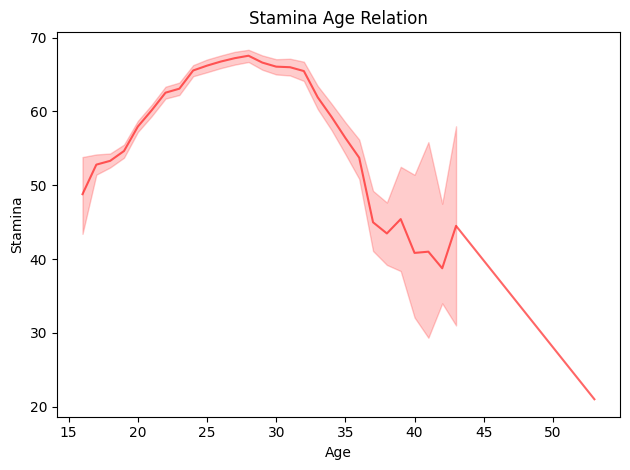

In [41]:
sns.lineplot(x = 'Age', y = 'Stamina', data = df1, alpha = 0.6, color = 'Red')
plt.title('Stamina Age Relation')
plt.xlabel('Age')
plt.ylabel('Stamina')
plt.tight_layout()
plt.show()

In [42]:
player_counts=df1['Nationality'].value_counts()
player_counts

,count
Nationality,
England,1574
Germany,1178
Spain,1019
France,971
Argentina,861
...,...
New Caledonia,1
Bermuda,1
Tanzania,1


In [43]:
# Get player counts by nationality

import plotly.express as px
player_counts = df1['Nationality'].value_counts().reset_index()
player_counts.columns = ['Nationality', 'Player Count']
fig = px.choropleth(player_counts, locations='Nationality', locationmode='country names',  color='Player Count', hover_name='Nationality',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Player Counts by Nationality')

fig.show()


In [44]:
df1.columns

Index(['ID', 'Name', 'Nationality', 'Age', '↓OVA', 'POT', 'Club', 'Contract',
       'Positions', 'Height(cm)', 'Weight', 'Preferred Foot', 'BOV',
       'Best Position', 'Joined', 'Value', 'Wage', 'Release Clause(€)',
       'Attacking', 'Heading Accuracy', 'FK Accuracy', 'Shot Power', 'Stamina',
       'Strength', 'Long Shots', 'Positioning', 'Penalties', 'Goalkeeping',
       'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR(Out of 5★)',
       'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits'],
      dtype='object')

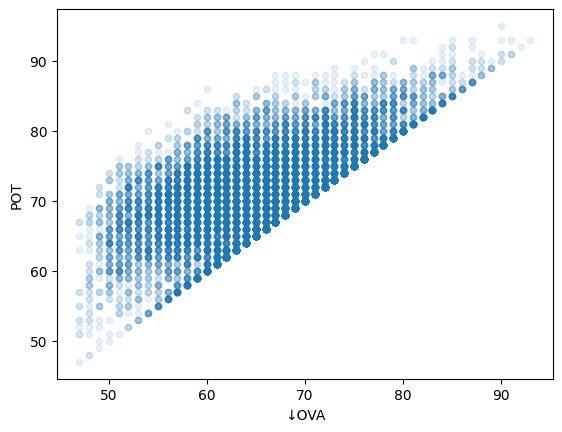

In [45]:
#relationship between POT and OVA
from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='↓OVA', y='POT', alpha=0.1)
plt.show()

In [46]:
# top players with  highest releae clause

import plotly.express as px
#  sort top 10 players
top_10_clause = df1[['Name', 'Release Clause(€)']].sort_values(by='Release Clause(€)', ascending=False).head(10)

fig = px.bar(top_10_clause, x='Name', y='Release Clause(€)',
             title="Top 10 Players with Highest Release Clauses",
             labels={'Name':'Player', 'Release Clause':'Release Clause (€)'})
fig.show()


In [47]:
#count of players by  best position
import plotly.express as px

position_counts = df['Best Position'].value_counts().reset_index()
position_counts.columns = ['Best Position', 'Count']

fig = px.bar(position_counts, x='Best Position', y='Count',
             labels={'Best Position': 'Best Position', 'Count': 'Number of Players'},
             title='Count of Players by Best Position')

fig.show()


In [48]:
df1.head()


,ID,Name,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height(cm),...,A/W,D/W,IR(Out of 5★),PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,2004 - 2021,"RW, ST, CF",170.0,...,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 - 2022,"ST, LW",187.0,...,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 - 2023,GK,188.0,...,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 - 2023,"CAM, CM",181.0,...,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 - 2022,"LW, CAM",175.0,...,High,Medium,5,91,85,86,94,36,59,595


In [49]:
club_counts = df1['Club'].value_counts().reset_index()
club_counts.columns = ['Club', 'Player Count']

In [50]:
club_counts.head(10)

,Club,Player Count
0,No Club,234
1,Cagliari,33
2,Valencia CF,33
3,Angers SCO,33
4,Wolverhampton Wanderers,33
5,Everton,33
6,RC Celta,33
7,Torino,33
8,Manchester United,33
9,Olympique de Marseille,33


In [51]:
#club with the highest number of players

import plotly.express as px
top_20_clubs = club_counts.head(20)

fig = px.bar(top_20_clubs, x='Club', y='Player Count', title="Top 20 Clubs with Most Players", labels={'Club':'Club', 'Player Count':'Number of Players'})

fig.show()


In [52]:
# the correlation between Age and PHY

correlation = df1['Age'].corr(df['PHY'])
print(f'Correlation between Age and PHY: {correlation:.2f}')


Correlation between Age and PHY: 0.45


In [53]:
import plotly.express as px

PHY_Age = df1.groupby('Age')['PHY'].mean().reset_index()

fig = px.line(PHY_Age, x='Age', y='PHY',
              labels={'Age': 'Age', 'PHY': 'Average Physical Attributes'},
              title='Average Physical Attributes by Age')

fig.show()


In [54]:
df1.isna().sum()

,0
ID,0
Name,0
Nationality,0
Age,0
↓OVA,0
POT,0
Club,0
Contract,0
Positions,0
Height(cm),0


In [55]:


dff=df[['PAC','Acceleration']]
dff.head(40)

,PAC,Acceleration
0,85,91
1,89,87
2,87,43
3,76,77
4,91,94
5,78,77
6,93,94
7,86,56
8,96,96
9,88,38


In [56]:
df1.shape

(17920, 42)

In [57]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [58]:
df1.columns

Index(['ID', 'Name', 'Nationality', 'Age', '↓OVA', 'POT', 'Club', 'Contract',
       'Positions', 'Height(cm)', 'Weight', 'Preferred Foot', 'BOV',
       'Best Position', 'Joined', 'Value', 'Wage', 'Release Clause(€)',
       'Attacking', 'Heading Accuracy', 'FK Accuracy', 'Shot Power', 'Stamina',
       'Strength', 'Long Shots', 'Positioning', 'Penalties', 'Goalkeeping',
       'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR(Out of 5★)',
       'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits'],
      dtype='object')

In [59]:
foot_preference_counts=df['Preferred Foot'].value_counts()

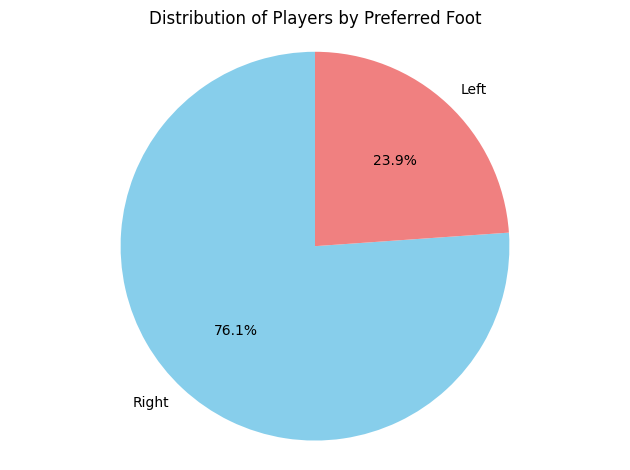

In [60]:

# plt.figure(figsize=(8, 8))
plt.pie(foot_preference_counts, labels=foot_preference_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Players by Preferred Foot')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [61]:
correlation = df1['Base Stats'].corr(df1['Total Stats'])

print(f'Correlation coefficient between Base Stats and Total Stats: {correlation:.2f}')

Correlation coefficient between Base Stats and Total Stats: 0.68


In [62]:
#Base Stats vs Total Stats for Top 10 Players
import pandas as pd
import plotly.graph_objs as go

top_10_players = df1.sort_values(by='↓OVA', ascending=False).head(10)

trace1 = go.Scatter(x=top_10_players['Name'], y=top_10_players['Base Stats'], mode='lines+markers', name='Base Stats', line=dict(color='skyblue'))
trace2 = go.Scatter(x=top_10_players['Name'], y=top_10_players['Total Stats'], mode='lines+markers', name='Total Stats', line=dict(color='lightcoral'))

fig = go.Figure([trace1, trace2])
fig.update_layout(title='Base Stats vs Total Stats for Top 10 Players',xaxis_title='Player Name', yaxis_title='Stats')

fig.show()


In [63]:
import pandas as pd
import plotly.express as px

top_10_players = df1.sort_values(by='↓OVA', ascending=False).head(10)

fig = px.scatter(top_10_players, x='Base Stats', y='Total Stats', text='Name', title='Scatter Plot of Base Stats vs Total Stats for Top 10 Players')

fig.update_traces(textposition='top center')
fig.update_layout(xaxis_title='Base Stats', yaxis_title='Total Stats')

fig.show()


In [64]:
df['Hits']

,Hits
0,771
1,562
2,150
3,207
4,595
...,...
18974,NaN
18975,NaN
18976,NaN
18977,NaN


In [65]:

def convert(value):
    if pd.isna(value) or value == 'nan':
        return None
    if isinstance(value, str) and 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    if isinstance(value, str):
        return int(value)
    return value

df1['Hits'] = df1['Hits'].apply(convert)



<ipython-input-65-e827b4cb2f4b>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
mode=df1['Hits'].mode()[0]

In [67]:
df1['Hits'].fillna(mode, inplace=True)

<ipython-input-67-09bebec8954b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
# df1['Hits'] = df1['Hits'].astype('int64')

In [69]:
df1['Hits'].head()

,Hits
0,771.0
1,562.0
2,150.0
3,207.0
4,595.0


In [70]:
df1['Hits']

,Hits
0,771.0
1,562.0
2,150.0
3,207.0
4,595.0
...,...
18974,1.0
18975,1.0
18976,1.0
18977,1.0


In [71]:
ds=df1[['Wage','Value']]
ds

,Wage,Value
0,€560K,€103.5M
1,€220K,€63M
2,€125K,€120M
3,€370K,€129M
4,€270K,€132M
...,...,...
18974,€1K,€100K
18975,€500,€130K
18976,€500,€120K
18977,€2K,€100K


In [72]:
def convert_to_numeric(value):
    value = value.replace('€', '').replace(',', '')
    if 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    else:
        return float(value)

In [73]:
df1['Wage'] = df1['Wage'].apply(convert_to_numeric)

<ipython-input-73-f9d442d74a18>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
df1['Value'] = df1['Value'].apply(convert_to_numeric)

<ipython-input-74-e902f0705fa2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
ds=df1[['Wage','Value']]
ds

,Wage,Value
0,560000.0,103500000.0
1,220000.0,63000000.0
2,125000.0,120000000.0
3,370000.0,129000000.0
4,270000.0,132000000.0
...,...,...
18974,1000.0,100000.0
18975,500.0,130000.0
18976,500.0,120000.0
18977,2000.0,100000.0


In [76]:
df1.shape

(17920, 42)

In [77]:
df1.isna().sum()

,0
ID,0
Name,0
Nationality,0
Age,0
↓OVA,0
POT,0
Club,0
Contract,0
Positions,0
Height(cm),0


In [78]:
import pandas as pd
correlation = df1[['Age', 'PAC']].corr().loc['Age', 'PAC']
print(f"Correlation coefficient between Age and PAC: {correlation:.2f}")


Correlation coefficient between Age and PAC: -0.13


In [79]:
import pandas as pd
import plotly.express as px

df_sample = df.sample(n=10000, random_state=1)

# scatter plot with a trend line
fig = px.scatter(df_sample, x='Age', y='PAC', trendline='ols',labels={'Age': 'Age', 'PAC': 'PAC'}, title='Scatter Plot with Trend Line of PAC vs Age')

fig.update_layout(xaxis=dict(gridcolor='black'), yaxis=dict(gridcolor='black')
)

fig.show()


In [80]:
import pandas as pd
correlation = df1[['Penalties', 'Long Shots']].corr().loc['Penalties', 'Long Shots']
print(f"Correlation coefficient between Penalties and Long Shots: {correlation:.2f}")

Correlation coefficient between Penalties and Long Shots: 0.82


In [81]:
#  scatter plot with a trend line
fig = px.scatter(df1, x='Penalties', y='Long Shots', trendline='ols',labels={'Penalties': 'Penalties', 'Long Shots': 'Long Shots'},title=f'Scatter Plot of Penalties vs Long Shots')

fig.update_layout(xaxis=dict(gridcolor='black'), yaxis=dict(gridcolor='black')
)

fig.show()

In [82]:
df1

,ID,Name,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height(cm),...,A/W,D/W,IR(Out of 5★),PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,2004 - 2021,"RW, ST, CF",170.0,...,Medium,Low,5,85,92,91,95,38,65,771.0
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 - 2022,"ST, LW",187.0,...,High,Low,5,89,93,81,89,35,77,562.0
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 - 2023,GK,188.0,...,Medium,Medium,3,87,92,78,90,52,90,150.0
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 - 2023,"CAM, CM",181.0,...,High,High,4,76,86,93,88,64,78,207.0
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 - 2022,"LW, CAM",175.0,...,High,Medium,5,91,85,86,94,36,59,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,China PR,21,47,55,Wuhan Zall,2018 - 2022,CB,178.0,...,Medium,Medium,1,64,28,26,38,48,51,1.0
18975,258760,B. Hough,England,17,47,67,Oldham Athletic,2020 - 2021,CM,175.0,...,Medium,Medium,1,64,40,48,49,35,45,1.0
18976,252757,R. McKinley,England,18,47,65,Derry City,2019 - 2020,CM,179.0,...,Medium,Medium,1,63,39,44,46,40,53,1.0
18977,243790,Wang Zhen'ao,China PR,20,47,57,Dalian YiFang FC,2020 - 2022,RW,175.0,...,Medium,Medium,1,58,49,41,49,30,44,1.0


<ipython-input-91-54cd2bae2504>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




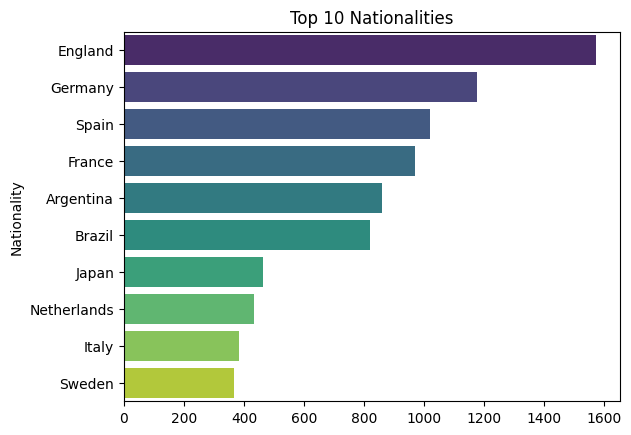

In [91]:
top_nationalities = df1['Nationality'].value_counts().head(10)
sns.barplot(x=top_nationalities.values, y=top_nationalities.index, palette='viridis')
plt.title("Top 10 Nationalities")
plt.show()

In [84]:
# Count players by 'Best Position' pie chart

import plotly.express as px
position_counts = df['Best Position'].value_counts().reset_index()
position_counts.columns = ['Best Position', 'Count']

fig = px.pie(position_counts,names='Best Position',values='Count',title='Distribution of Players by Best Position',color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()


In [85]:
df1

,ID,Name,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height(cm),...,A/W,D/W,IR(Out of 5★),PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,2004 - 2021,"RW, ST, CF",170.0,...,Medium,Low,5,85,92,91,95,38,65,771.0
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 - 2022,"ST, LW",187.0,...,High,Low,5,89,93,81,89,35,77,562.0
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 - 2023,GK,188.0,...,Medium,Medium,3,87,92,78,90,52,90,150.0
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 - 2023,"CAM, CM",181.0,...,High,High,4,76,86,93,88,64,78,207.0
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 - 2022,"LW, CAM",175.0,...,High,Medium,5,91,85,86,94,36,59,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,China PR,21,47,55,Wuhan Zall,2018 - 2022,CB,178.0,...,Medium,Medium,1,64,28,26,38,48,51,1.0
18975,258760,B. Hough,England,17,47,67,Oldham Athletic,2020 - 2021,CM,175.0,...,Medium,Medium,1,64,40,48,49,35,45,1.0
18976,252757,R. McKinley,England,18,47,65,Derry City,2019 - 2020,CM,179.0,...,Medium,Medium,1,63,39,44,46,40,53,1.0
18977,243790,Wang Zhen'ao,China PR,20,47,57,Dalian YiFang FC,2020 - 2022,RW,175.0,...,Medium,Medium,1,58,49,41,49,30,44,1.0


In [86]:
df1.shape

(17920, 42)

In [87]:
df1.isna().sum()

,0
ID,0
Name,0
Nationality,0
Age,0
↓OVA,0
POT,0
Club,0
Contract,0
Positions,0
Height(cm),0
